In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("Book1.csv")

In [5]:
data

,age,compition,type,profit
0,old,yes,sw,down
1,old,no,sw,down
2,old,no,hw,down
3,mid,yes,sw,down
4,mid,yes,hw,up
5,mid,no,hw,up
6,mid,no,sw,up
7,new,yes,sw,up
8,new,no,hw,up
9,new,no,sw,up


In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.tree import plot_tree

In [8]:
plot_tree(data)

TypeError:    age compition type profit
0  old       yes   sw   down
1  old        no   sw   down
2  old        no   hw   down
3  mid       yes   sw   down
4  mid       yes   hw     up
5  mid        no   hw     up
6  mid        no   sw     up
7  new       yes   sw     up
8  new        no   hw     up
9  new        no   sw     up is not an estimator instance.

In [9]:
data

,age,compition,type,profit
0,old,yes,sw,down
1,old,no,sw,down
2,old,no,hw,down
3,mid,yes,sw,down
4,mid,yes,hw,up
5,mid,no,hw,up
6,mid,no,sw,up
7,new,yes,sw,up
8,new,no,hw,up
9,new,no,sw,up


In [10]:
data['age']=data["age"].replace("old",1)
data['age']=data["age"].replace("mid",2)
data['age']=data["age"].replace("new",3)

In [11]:
data["compition"]=data["compition"].replace("yes",4)
data["compition"]=data["compition"].replace("no",5)

data["type"]=data["type"].replace("sw",6)
data["type"]=data["type"].replace("hw",7)

data["profit"]=data["profit"].replace("down",8)
data["profit"]=data["profit"].replace("up",9)

In [12]:
data

,age,compition,type,profit
0,1,4,6,8
1,1,5,6,8
2,1,5,7,8
3,2,4,6,8
4,2,4,7,9
5,2,5,7,9
6,2,5,6,9
7,3,4,6,9
8,3,5,7,9
9,3,5,6,9


In [13]:
y=data["profit"]
x=data. iloc[:, [0,1,2]]

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf=DecisionTreeClassifier().fit(x,y)

In [16]:
from sklearn import tree
tree.export_graphviz(data,out_file="profit.dot",feature_names=["age","compition","type"],label='all',rounded=True,filled=True)

TypeError:    age  compition  type  profit
0    1          4     6       8
1    1          5     6       8
2    1          5     7       8
3    2          4     6       8
4    2          4     7       9
5    2          5     7       9
6    2          5     6       9
7    3          4     6       9
8    3          5     7       9
9    3          5     6       9 is not an estimator instance.

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# create a decision tree classifier and fit it to your data
clf = DecisionTreeClassifier()
clf.fit(x, y)

# export the decision tree to a file
export_graphviz(clf, out_file="tree.dot", 
                feature_names=["age", "competition", "type"])


In [18]:
data

,age,compition,type,profit
0,1,4,6,8
1,1,5,6,8
2,1,5,7,8
3,2,4,6,8
4,2,4,7,9
5,2,5,7,9
6,2,5,6,9
7,3,4,6,9
8,3,5,7,9
9,3,5,6,9


In [19]:
x = pd.get_dummies(x, columns=['age', 'compition', 'type'])


In [20]:
clf = DecisionTreeClassifier()
clf.fit(x, y)


DecisionTreeClassifier()

In [21]:
tree.export_graphviz(clf, out_file="profit.dot", feature_names=x.columns)


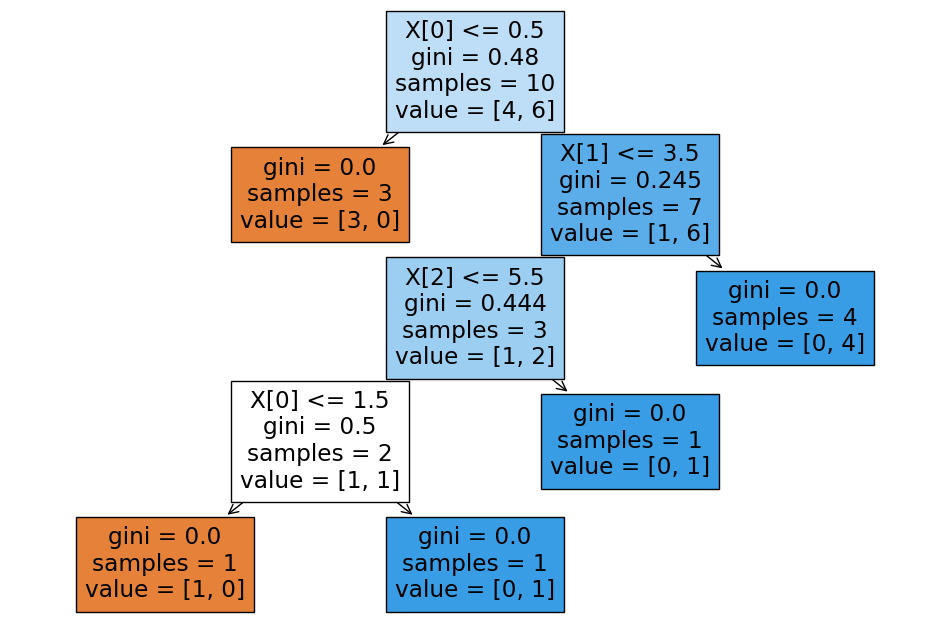

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# load the dataset
df = pd.read_csv('Book1.csv')

# encode categorical variables
df['age'] = df['age'].map({'old': 0, 'mid': 1, 'new': 2})
df['compition'] = df['compition'].map({'yes': 3, 'no': 4})
df['type'] = df['type'].map({'sw': 5, 'hw': 6})

# split the data into features (X) and target (y)
X = df[['age', 'compition', 'type']]
y = df['profit']

# create a decision tree classifier and fit it to your data
clf = DecisionTreeClassifier()
clf.fit(X, y)

# plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True)
plt.show()


[Text(0.6, 0.9, 'age <= 1.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]\nclass = up'),
 Text(0.4, 0.7, 'compition <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = up'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = up'),
 Text(0.6, 0.5, 'age <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = up'),
 Text(0.4, 0.3, 'type <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = down'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = up'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = down'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = up'),
 Text(0.8, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = down')]

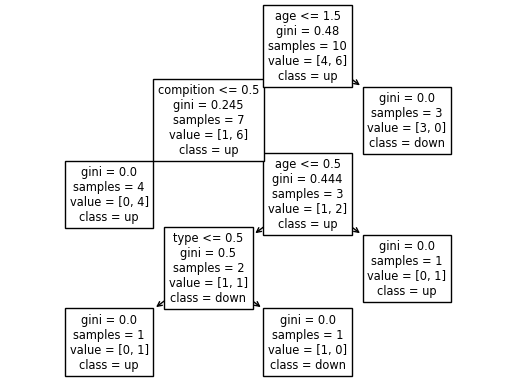

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# load the dataset
df = pd.read_csv('Book1.csv')

# separate the features and target variable
X = df.drop('profit', axis=1)
y = df['profit']

# label encode the categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# create a decision tree classifier and fit it to your data
clf = DecisionTreeClassifier()
clf.fit(X, y)

# plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=y.unique())


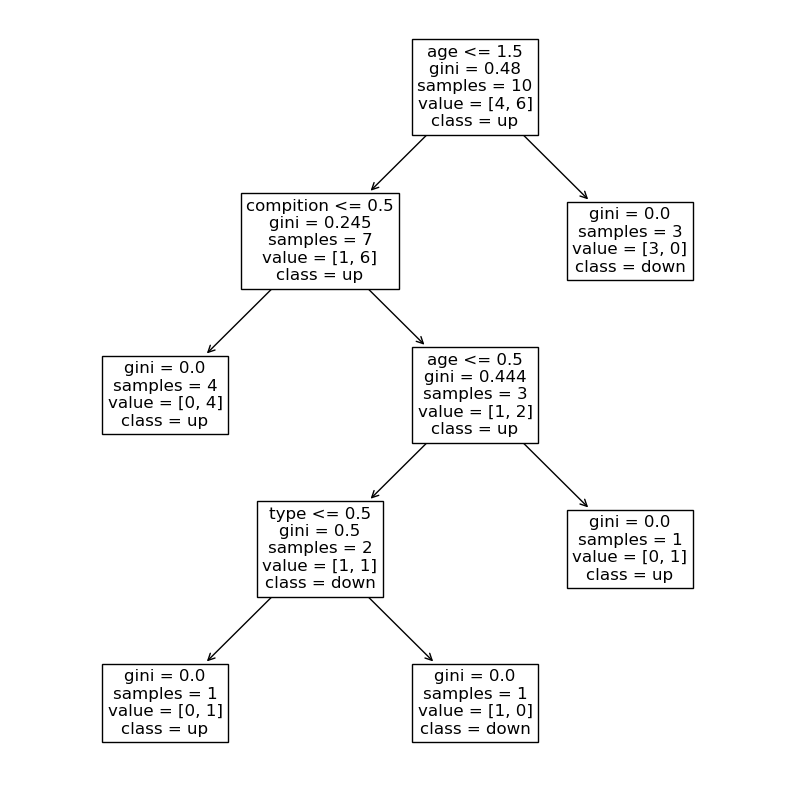

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# load the dataset
df = pd.read_csv('Book1.csv')

# separate the features and target variable
X = df.drop('profit', axis=1)
y = df['profit']

# label encode the categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# create a decision tree classifier and fit it to your data
clf = DecisionTreeClassifier()
clf.fit(X, y)

# plot the decision tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(clf, ax=ax, feature_names=X.columns, class_names=y.unique(), fontsize=12)
plt.show()


In [98]:
a=["mango","banana","cherry"]
if "banana" and "mango" in a:
    print("yes")

yes
